In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
scholarData = pd.read_csv("scholars.csv")
scholarData.head(3)

,Name,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,Yes,90-100,Upto 1.5L,In,1
1,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,No,90-100,Upto 1.5L,In,1
2,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Muslim,Yes,Yes,Yes,90-100,Upto 1.5L,In,1


In [4]:
scholarData.describe()

,Outcome
count,245760.000000
mean,0.133333
std,0.339935
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
dataColumns = scholarData.columns
print(dataColumns)

Index(['Name', 'Education Qualification', 'Gender', 'Community', 'Religion',
       'Exservice-men', 'Disability', 'Sports', 'Annual-Percentage', 'Income',
       'India', 'Outcome'],
      dtype='object')


In [6]:
print("Unique values in each column: ")
print()
for column in scholarData.columns:
    print(f"{column}: {scholarData[column].unique()}")
    print()

Unique values in each column: 

Name: ['INSPIRE Scholarship 2022-23 ? Scholarship for Higher Education (SHE)'
 'Abdul Kalam Technology Innovation National Fellowship'
 'AAI Sports Scholarship Scheme in India 2022-23'
 'Glow and lovely Career Foundation Scholarship'
 'National Fellowship for Persons with Disabilities'
 'ONGC Sports Scholarship Scheme 2022-23'
 'Pragati Scholarship ? AICTE-Scholarship Scheme to Girl Child'
 'Dr. Ambedkar post matric Scholarship'
 'Indira Gandhi Scholarship for Single Girl Child UGC Scholarship for PG Programmes'
 'National Overseas Scholarship Scheme 2021-22']

Education Qualification: ['Undergraduate' 'Postgraduate' 'Doctrate']

Gender: ['Male' 'Female']

Community: ['General' 'OBC' 'SC/ST' 'Minority']

Religion: ['Hindu' 'Muslim' 'Chirstian' 'Others']

Exservice-men: ['Yes' 'No']

Disability: ['Yes' 'No']

Sports: ['Yes' 'No']

Annual-Percentage: ['90-100' '80-90' '70-80' '60-70']

Income: ['Upto 1.5L' '1.5L to 3L' '3L to 6L' 'Above 6L']

India: ['In' 

In [7]:
scholarData.isnull().sum()

Name                       0
Education Qualification    0
Gender                     0
Community                  0
Religion                   0
Exservice-men              0
Disability                 0
Sports                     0
Annual-Percentage          0
Income                     0
India                      0
Outcome                    0
dtype: int64

In [8]:
scholarData = scholarData.dropna()
scholarData.tail(3)

,Name,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,India,Outcome
245757,National Overseas Scholarship Scheme 2021-22,Doctrate,Female,Minority,Chirstian,No,No,No,60-70,Above 6L,Out,1
245758,National Overseas Scholarship Scheme 2021-22,Doctrate,Female,Minority,Others,No,No,Yes,60-70,Above 6L,Out,1
245759,National Overseas Scholarship Scheme 2021-22,Doctrate,Female,Minority,Others,No,No,No,60-70,Above 6L,Out,1


In [9]:
print(scholarData["Outcome"].value_counts())
print("Mean: ", scholarData["Outcome"].mean())
print("STD: ", scholarData["Outcome"].std())

Outcome
0    212992
1     32768
Name: count, dtype: int64
Mean:  0.13333333333333333
STD:  0.33993532584041347


In [11]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for column in scholarData.columns:
    le = LabelEncoder()
    scholarData[column] = le.fit_transform(scholarData[column])
    encoders[column] = le



In [30]:
scholarData.head()

,Name,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,4,2,1,0,1,1,1,1,3,3,0,1
1,4,2,1,0,1,1,1,0,3,3,0,1
2,4,2,1,0,2,1,1,1,3,3,0,1
3,4,2,1,0,2,1,1,0,3,3,0,1
4,4,2,1,0,0,1,1,1,3,3,0,1


In [12]:
scholarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245760 entries, 0 to 245759
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Name                     245760 non-null  int64
 1   Education Qualification  245760 non-null  int64
 2   Gender                   245760 non-null  int64
 3   Community                245760 non-null  int64
 4   Religion                 245760 non-null  int64
 5   Exservice-men            245760 non-null  int64
 6   Disability               245760 non-null  int64
 7   Sports                   245760 non-null  int64
 8   Annual-Percentage        245760 non-null  int64
 9   Income                   245760 non-null  int64
 10  India                    245760 non-null  int64
 11  Outcome                  245760 non-null  int64
dtypes: int64(12)
memory usage: 22.5 MB


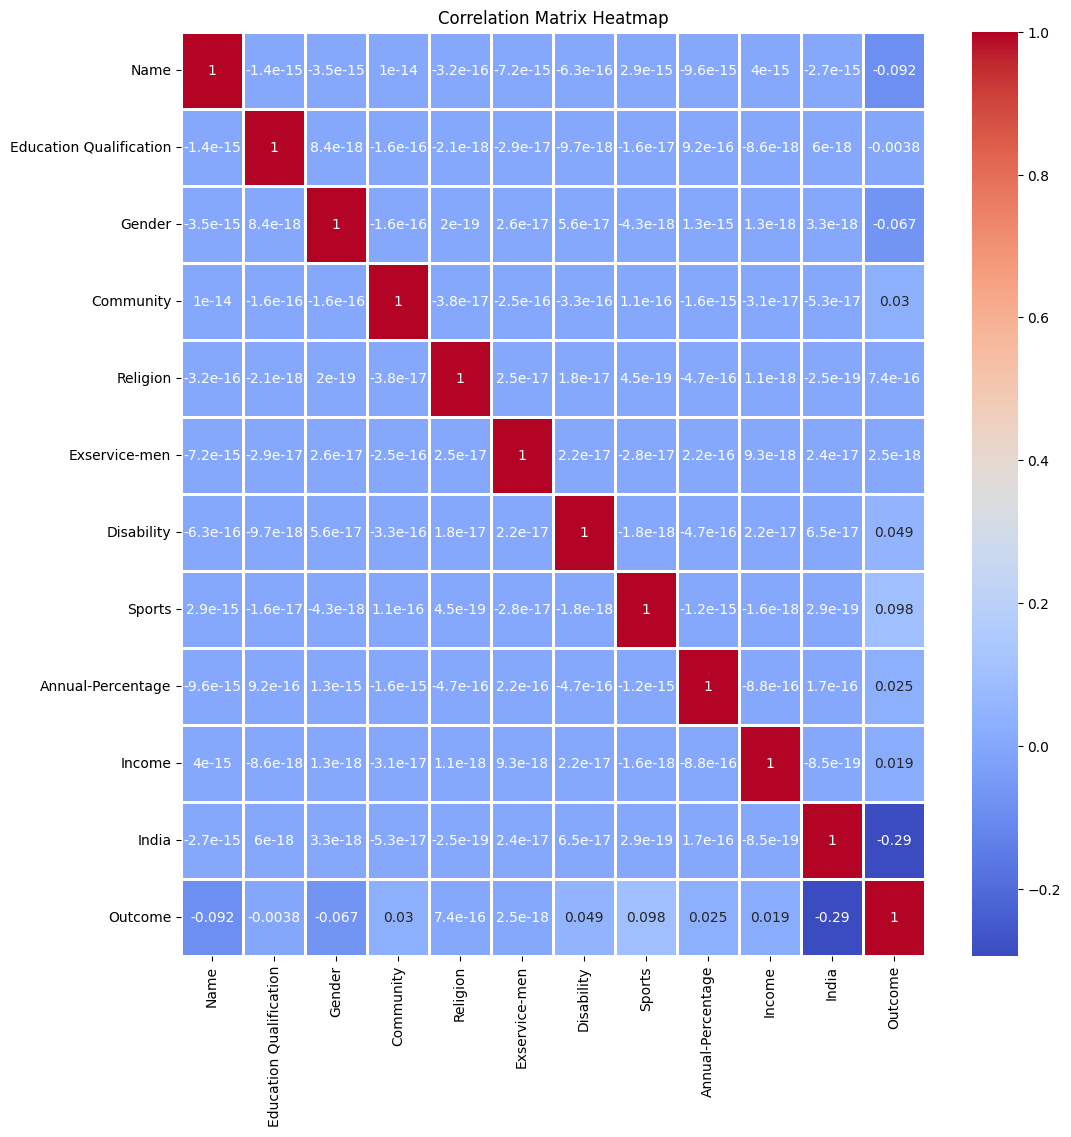

In [13]:
corr_matrix = scholarData.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.75)
plt.title('Correlation Matrix Heatmap')
plt.show()

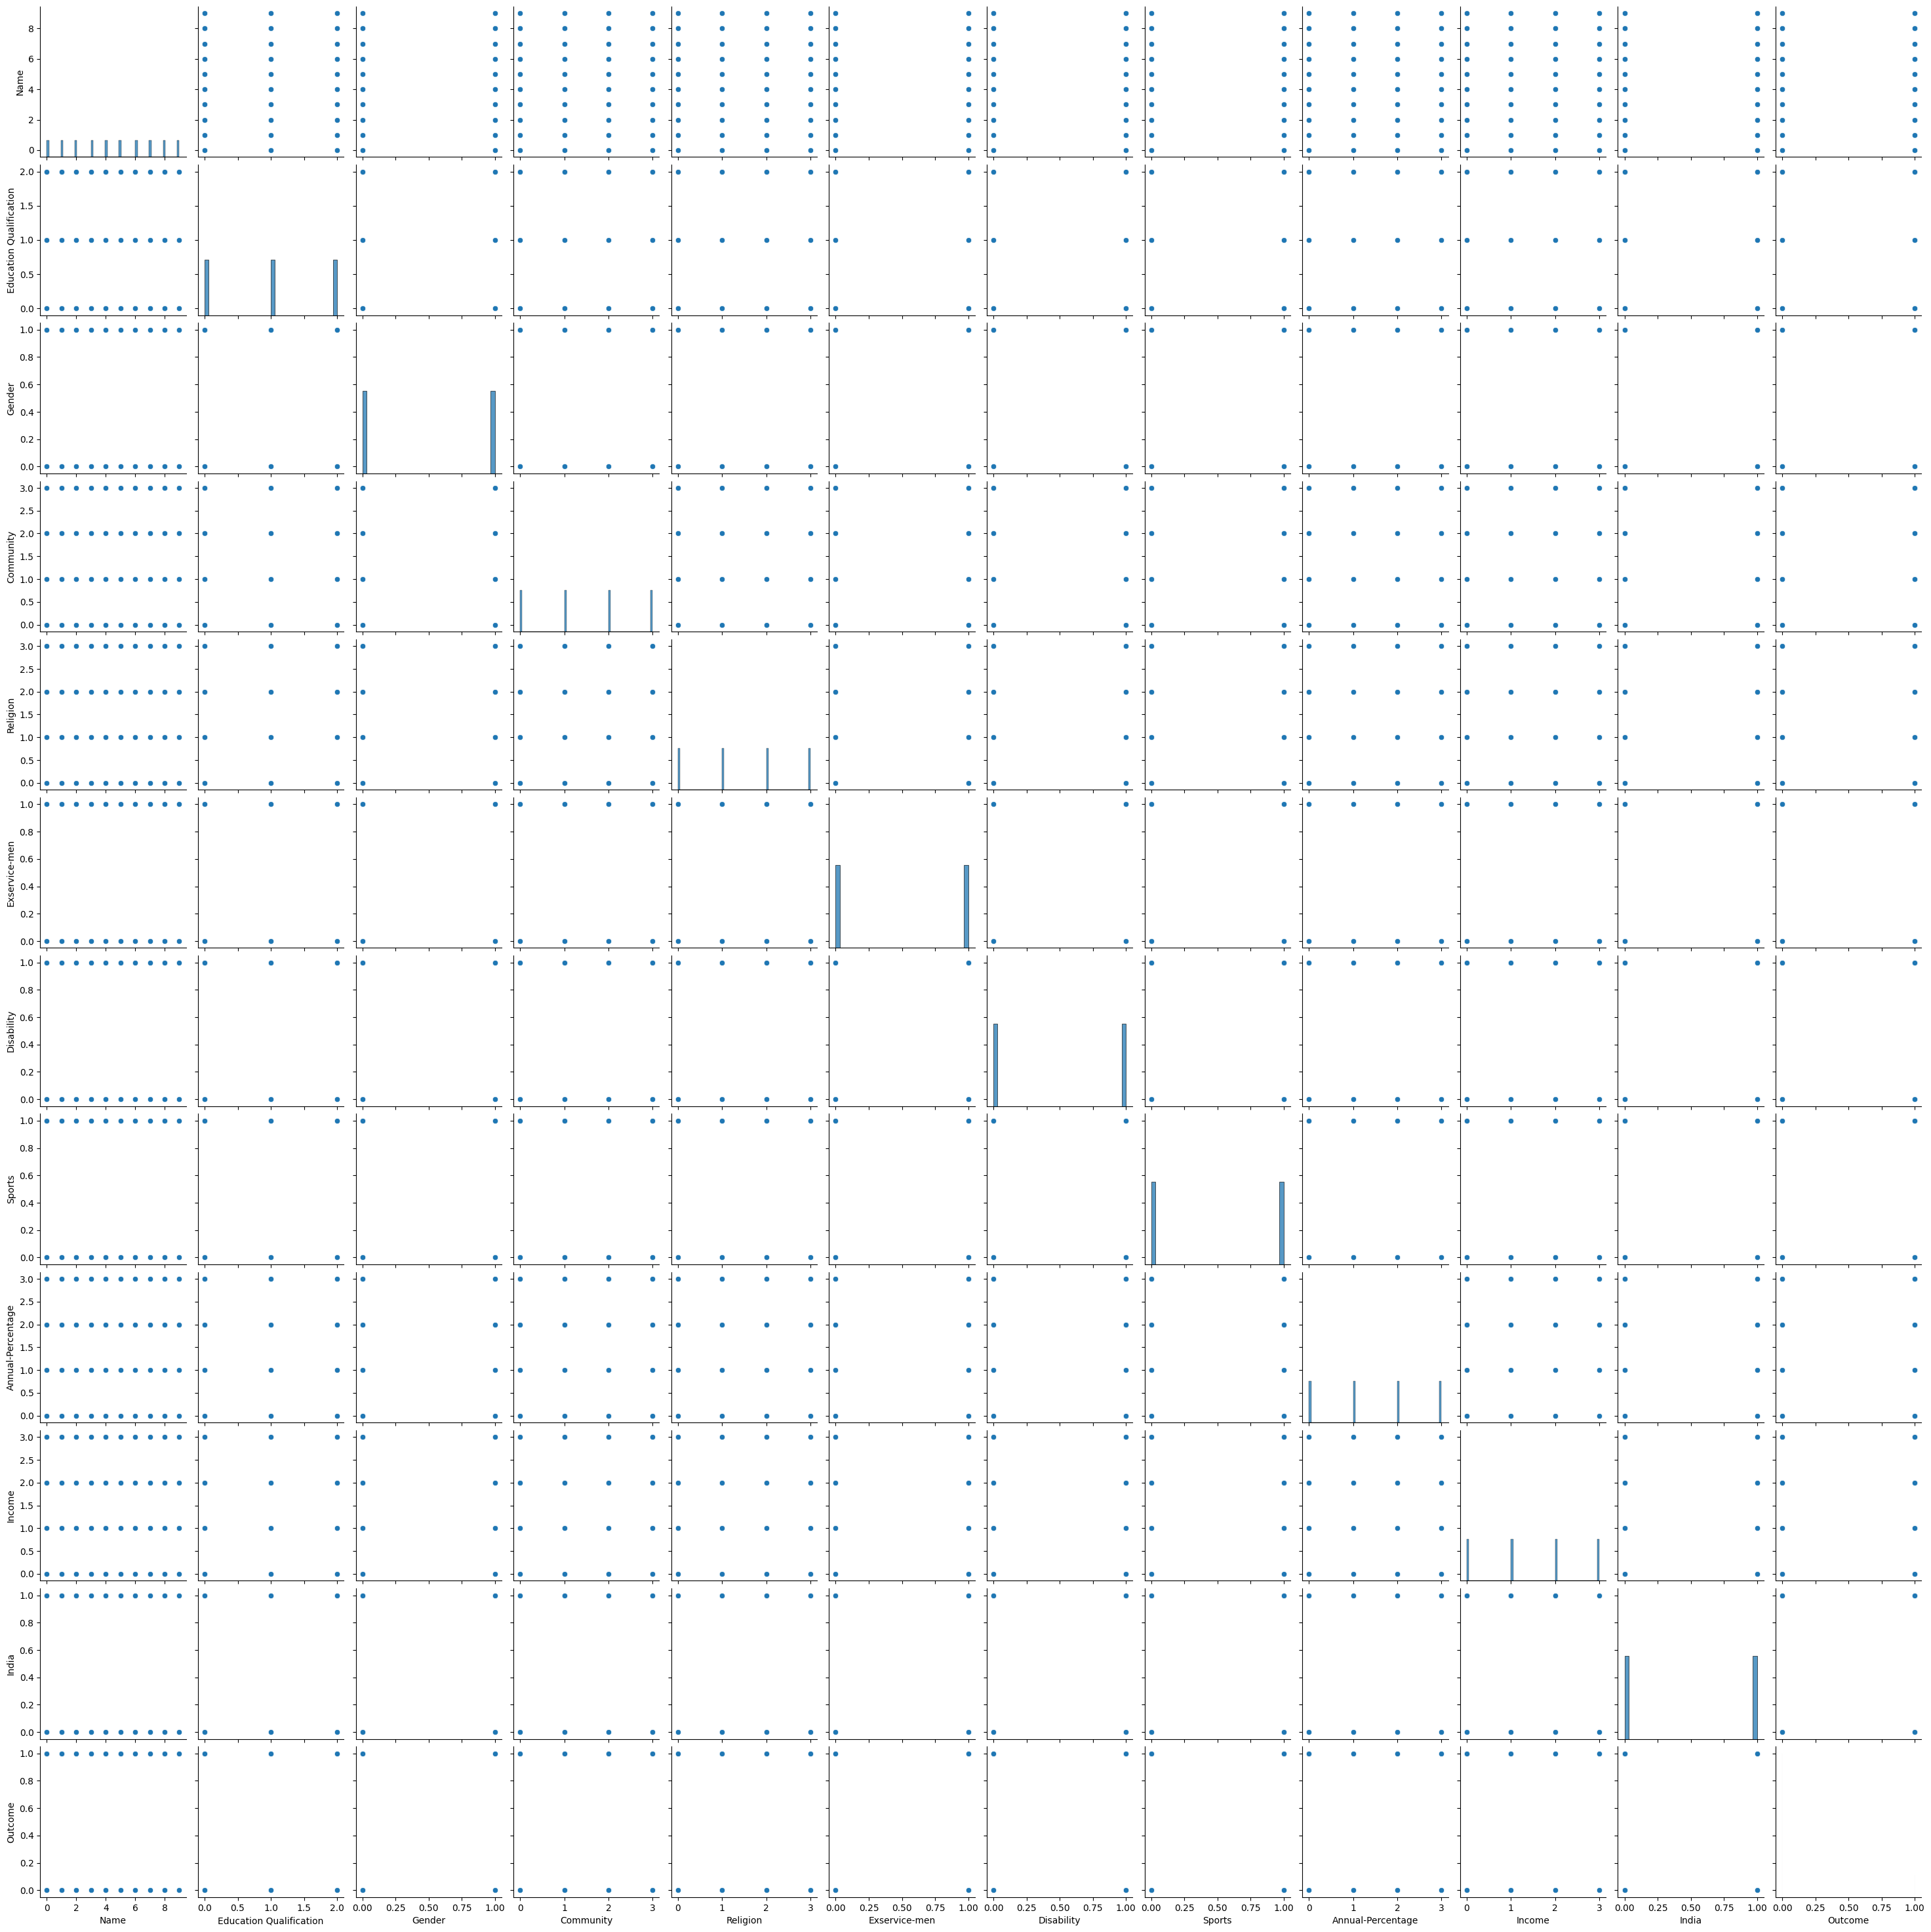

In [14]:
sns.pairplot(scholarData)

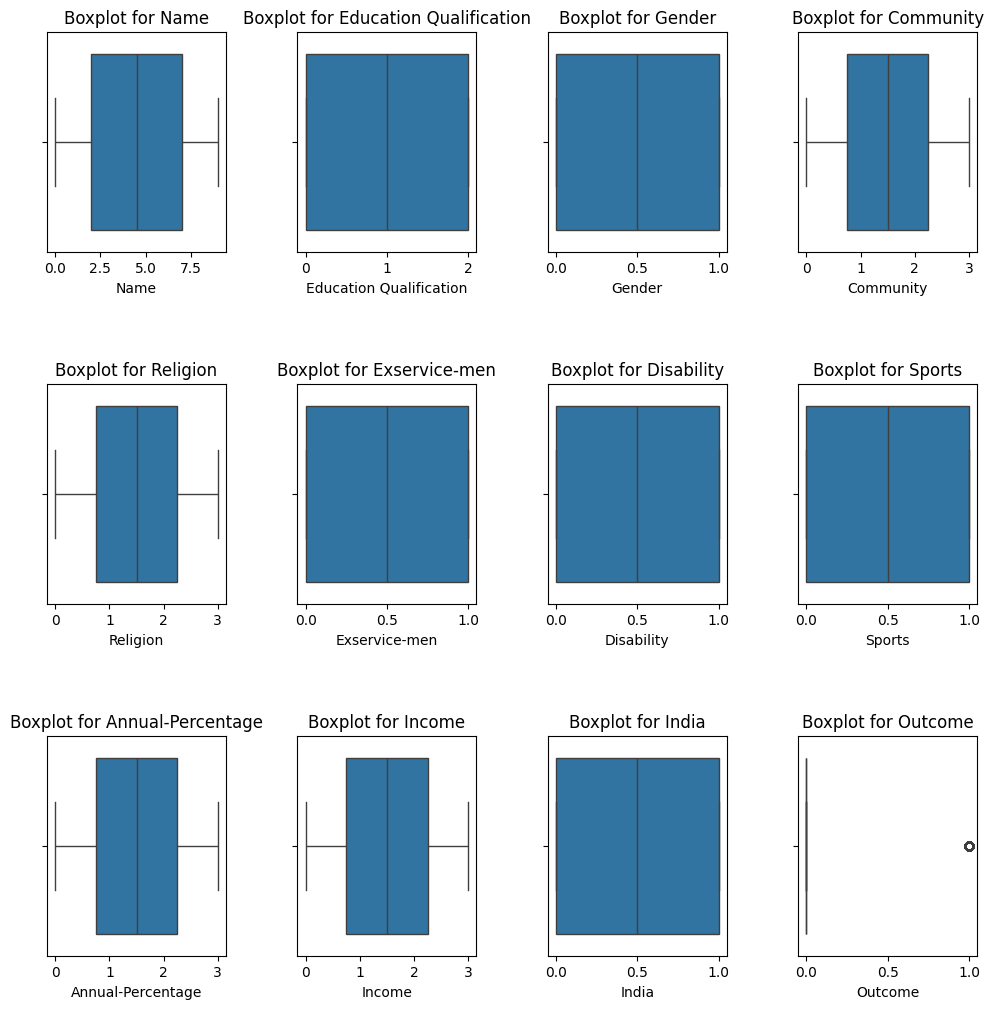

In [15]:
numerical_columns = scholarData.select_dtypes(include='number').columns
plots_per_row = 4
total_plots = len(numerical_columns)
rows = (total_plots + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(rows, plots_per_row, figsize=(12, rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.boxplot(data=scholarData, x=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot for {col}')

for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()


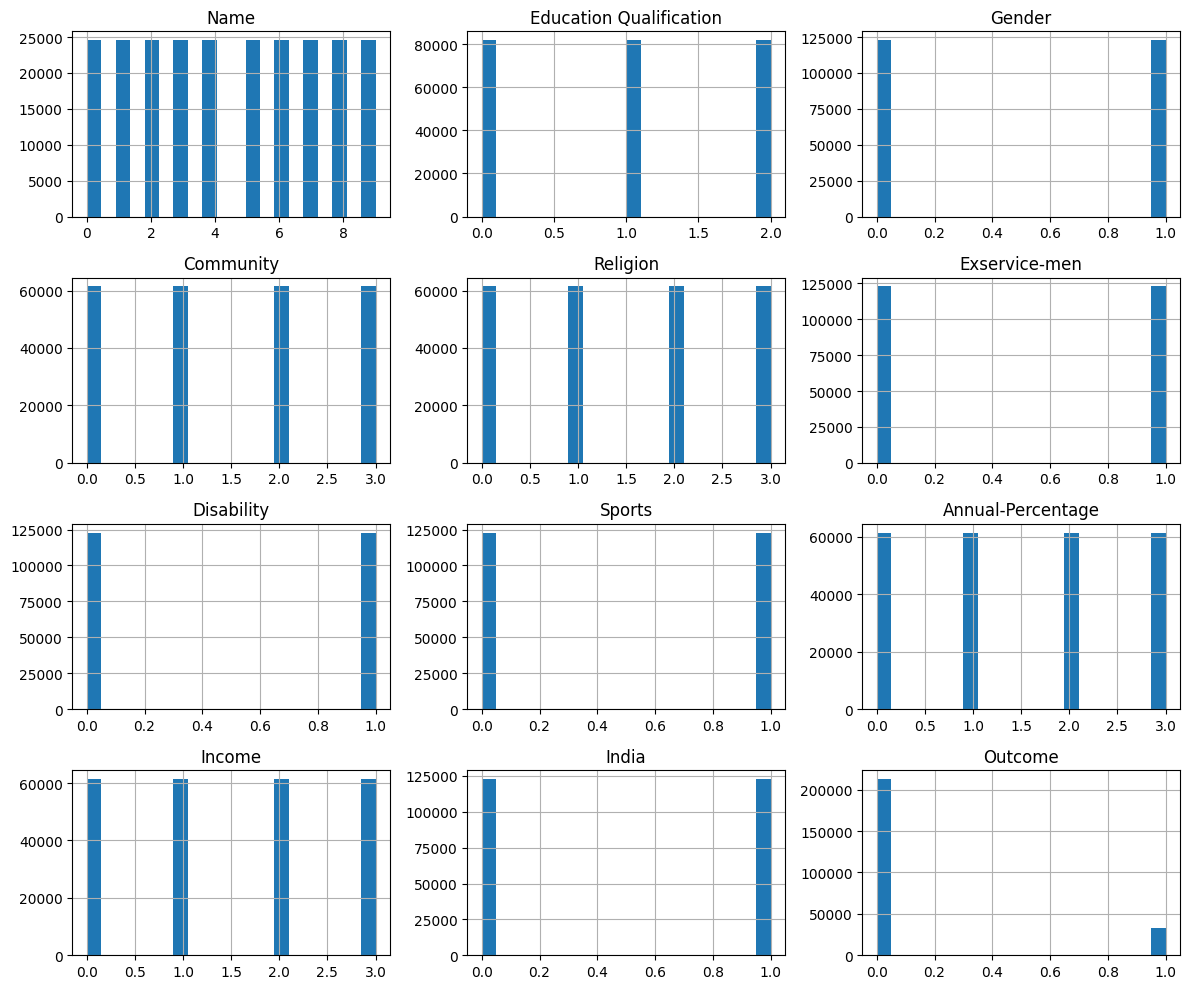

In [16]:
scholarData.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

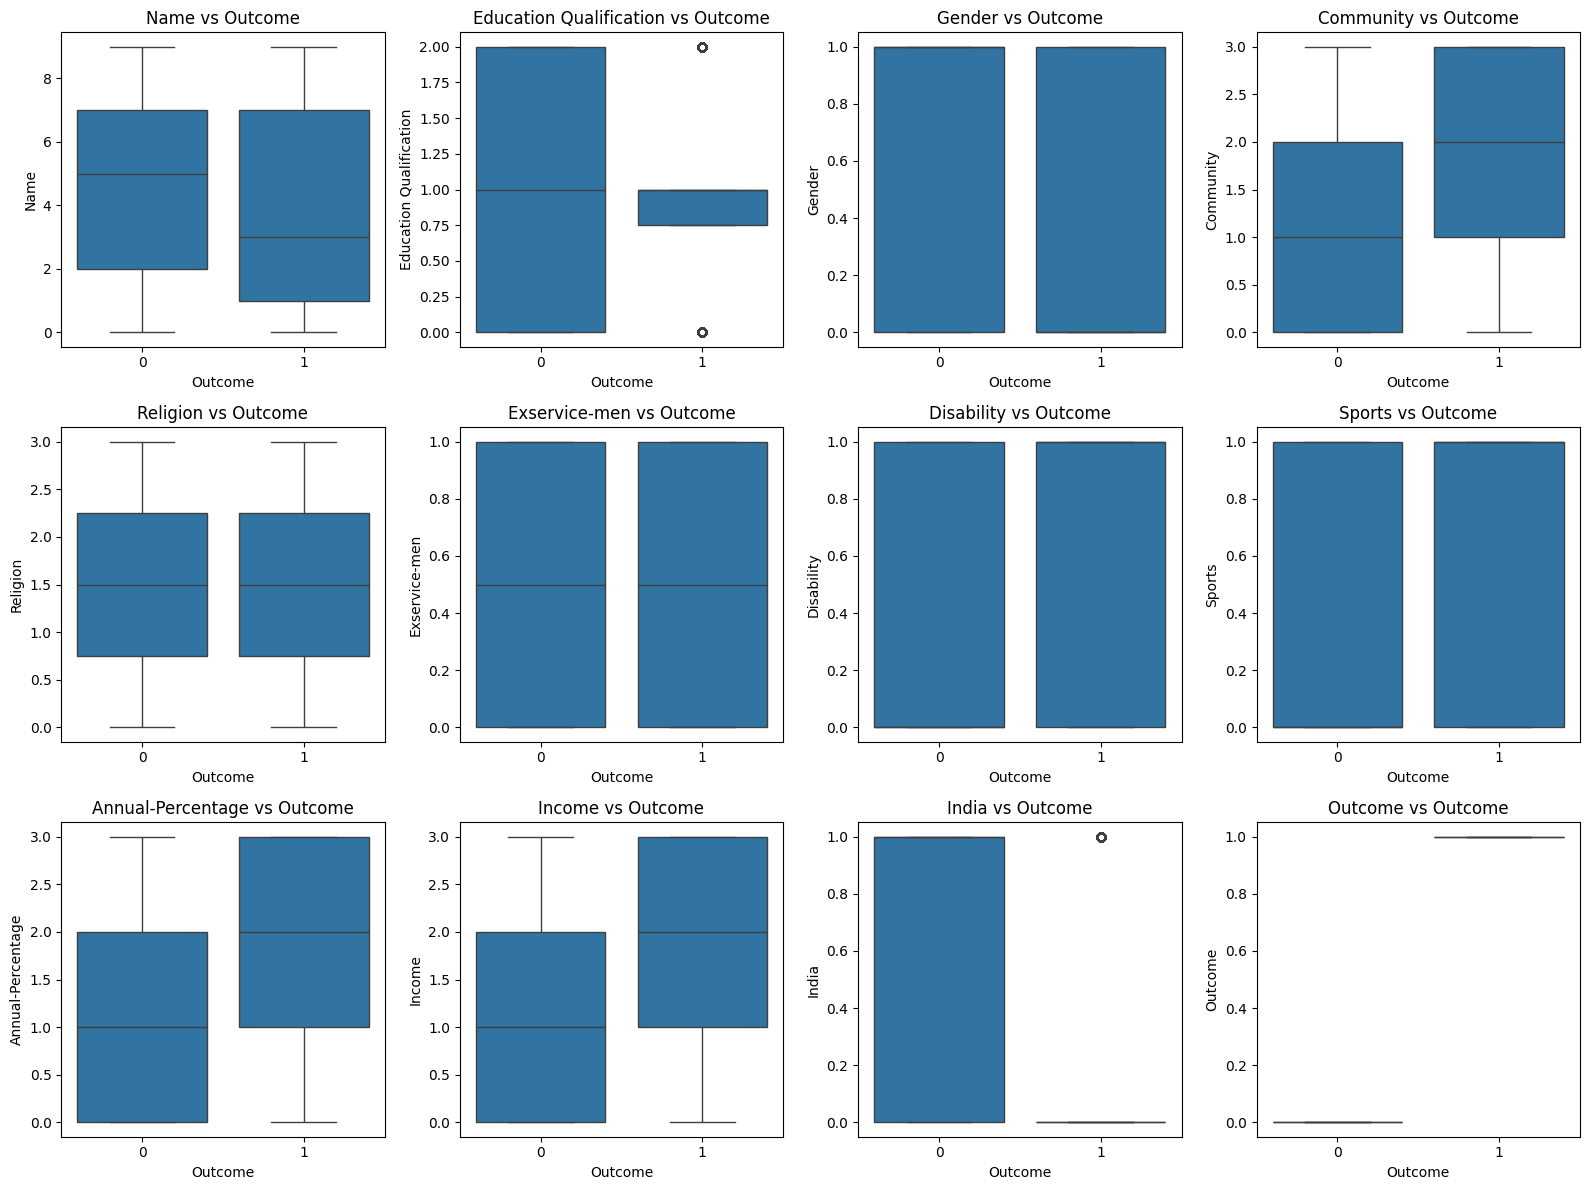

In [17]:

numerical_columns = scholarData.select_dtypes(include='number').columns
plots_per_row = 4
total_plots = len(numerical_columns)
rows = (total_plots + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(rows, plots_per_row, figsize=(16, rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.boxplot(data=scholarData, x='Outcome', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} vs Outcome')

for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [18]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

Data = scholarData.copy()
y = Data['Outcome']
x = Data.drop(['Outcome'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (147456, 11)
X_test shape: (98304, 11)
y_train shape: (147456,)
y_test shape: (98304,)


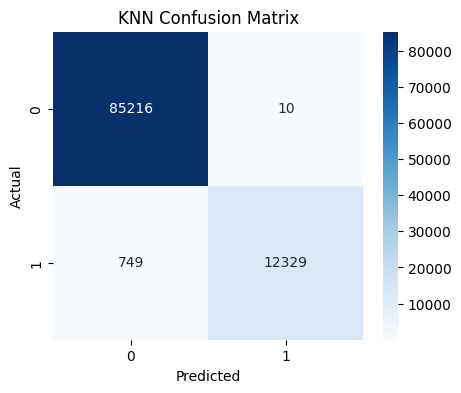

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     85226
           1       1.00      0.94      0.97     13078

    accuracy                           0.99     98304
   macro avg       1.00      0.97      0.98     98304
weighted avg       0.99      0.99      0.99     98304

KNN Accuracy: 99.2279052734375 %


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn) * 100, "%")
     

In [20]:
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation scores: [0.98731859 0.98741989 0.98725035 0.98474111 0.98582618]
Mean CV Accuracy: 0.9865112249934226


In [23]:
import pickle
with open('Scholarship.pkl','wb') as f:
    pickle.dump(knn,f)